In [1]:
from IPython.display import display
import spot
spot.setup()

Test syntax errors
------------------

In [2]:
%%file _example.aut
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
acc-name: Buchi
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[t] 1
State: 1
[t] 1
--END--
HOA: v1
States: 2
Start: 1
AP: 2 "a" "b"
Acceptance: 1 Inf(0)
--BODY--
State: 0 {0}
[a] 3
State: 1
[1] 0
[0&!1] 1
--END--

Writing _example.aut


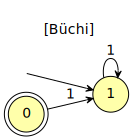

SyntaxError: 
_example.aut:20.2: syntax error, unexpected identifier
_example.aut:20.1-3: ignoring this invalid label
_example.aut:20.5: state number is larger than state count...
_example.aut:14.1-9: ... declared here.
 (<string>)

In [3]:
for a in spot.automata('_example.aut'):
    display(a)

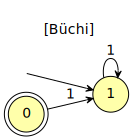

In [4]:
spot.automaton('_example.aut', timeout=100)

# Error reading from pipe

In [5]:
spot.automaton('non-existing-cmd |')

CalledProcessError: Command 'non-existing-cmd ' returned non-zero exit status 127.

In [6]:
spot.automaton('sleep 3; cat _example.aut |', timeout=1)

TimeoutExpired: Command 'sleep 3; cat _example.aut ' timed out after 1 seconds

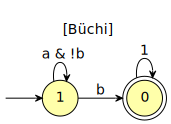

CalledProcessError: Command 'ltl2tgba "syntax U U error"' returned non-zero exit status 2.

In [7]:
for a in spot.automata("ltl2tgba 'a U b'|", 'ltl2tgba "syntax U U error"|'):
    display(a)

Reading an empty file with `spot.automaton()` is an error.

In [8]:
spot.automaton('true|')

RuntimeError: Failed to read automaton from true|

In [9]:
!rm _example.aut